In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [68]:


# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#now we can normalize the image, as we know the image is 255 pixel, we can just bring it down 
x_train=x_train.astype("float32") / 255.0
x_test=x_test.astype("float32") / 255.0

print("Original shapes:", y_train.shape, y_test.shape)

# Flatten label arrays
y_train = y_train.flatten()   # (50000,)
y_test = y_test.flatten()     # (10000,)

# One-hot encode
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)  # (50000, 10)
y_test = keras.utils.to_categorical(y_test, num_classes)    # (10000, 10)

print("After one-hot:", y_train.shape, y_test.shape)
print("Unique train classes:", np.unique(np.argmax(y_train, axis=1)))

Original shapes: (50000, 1) (10000, 1)
After one-hot: (50000, 10) (10000, 10)
Unique train classes: [0 1 2 3 4 5 6 7 8 9]


In [70]:
#build ans ANN model
from tensorflow.keras import layers

model=keras.Sequential ([
    layers.Dense(512, activation='relu',input_shape=(3072,)),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])


In [72]:
#now we can compile the model
model.compile(optimizer="Adam",loss="categorical_crossentropy",
              metrics=["accuracy"])

In [76]:
# Flatten images (32x32x3 = 3072 features)
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [78]:
#lets train the model
history=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2582 - loss: 2.1570 - val_accuracy: 0.3724 - val_loss: 1.7975
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3780 - loss: 1.7447 - val_accuracy: 0.4061 - val_loss: 1.7002
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4142 - loss: 1.6413 - val_accuracy: 0.4369 - val_loss: 1.6061
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4381 - loss: 1.5800 - val_accuracy: 0.4280 - val_loss: 1.5947
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4543 - loss: 1.5262 - val_accuracy: 0.4486 - val_loss: 1.5739
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4619 - loss: 1.4954 - val_accuracy: 0.4545 - val_loss: 1.5444
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4898 - loss: 1.4461 - val_accuracy: 0.4655 - val_loss: 1.5201
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4976 - loss: 1.4147 - val_acc

In [80]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Unique train classes:", np.unique(np.argmax(y_train, axis=1)))

y_train shape: (50000, 10)
y_test shape: (10000, 10)
Unique train classes: [0 1 2 3 4 5 6 7 8 9]


In [82]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.4772999882698059


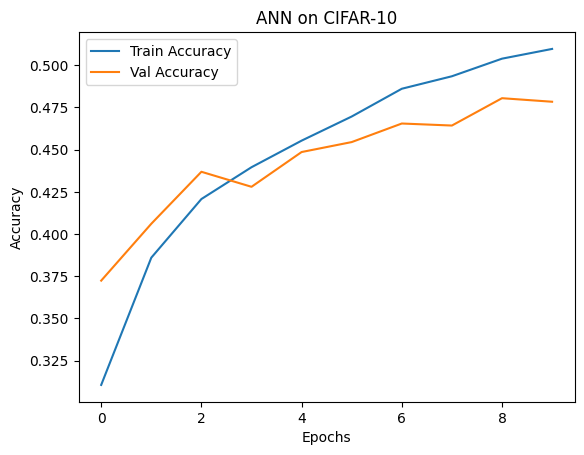

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN on CIFAR-10")
plt.legend()
plt.show()